In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.utils import reverse_cuthill_mckee_ordering

In [2]:
#grafo criado por mim para testes
G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,3),(0,4),(0,5),(6,7),(3,6),(0,8),(6,4),(6,5),(1,3)]) 

#printando os nós do grafo
print("---------------------")
print("ordem:",nx.nodes(G))       

#printando as insformações do grafo
#print("---------------------")
#print ("****informações do grafo***\n",nx.info(G))
#print("---------------------")

---------------------
ordem: [0, 1, 2, 3, 4, 5, 6, 7, 8]


In [3]:
print("*****matriz Laplace sem ordenação*****")
A = nx.laplacian_matrix(G) # Matriz laplaciana
x,y = np.nonzero(A)        #(numpy) números diferentes de 0 (nós vizinhos + o própio nó em questão)

# banda da matriz sem reorganizacao da matriz esparsa
print ("largura da banda da matriz: %d"%((y-x).max()+(x-y).max()+1))

*****matriz Laplace sem ordenação*****
largura da banda da matriz: 17


In [4]:
# transforma o grafo em uma "Sparse matrix"
rcm=list(reverse_cuthill_mckee_ordering(G))  

print("---------------------")
print ("reordenando:",rcm)
print("---------------------")
#R=nx.Graph()
#R.add_nodes_from(nodelist=rcm)
#print(R)

#Matriz laplaciana feita com a reorganização da matriz esparsa
B = nx.laplacian_matrix(G,nodelist=rcm)             
print("****Matriz Laplace com ordenação****")
x,y = np.nonzero(B)

#banda da "nova matriz"
print("bandwidth: %d"%((y-x).max()+(x-y).max()+1))       

---------------------
reordenando: [7, 3, 2, 6, 1, 5, 4, 0, 8]
---------------------
****Matriz Laplace com ordenação****
bandwidth: 7


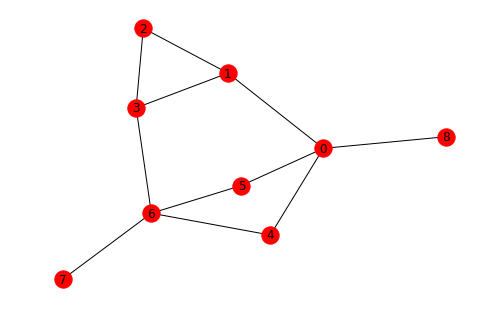

In [5]:
#printando o grafo
pos = nx.spring_layout(G)
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, font_size=12)

#nx.draw(G)
plt.show()                                   

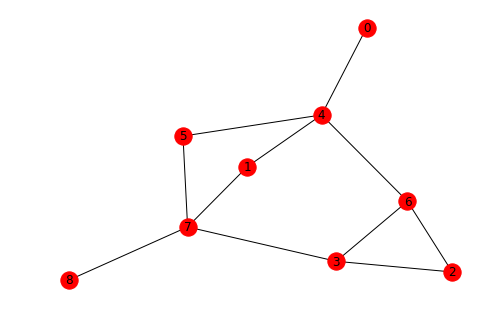

In [6]:
# PLOTANDO COM RCM
R = nx.Graph()
R.add_edges_from([(7,3),(3,2),(2,6),(1,7),(5,4),(0,4),(7,8),(7,5),(3,6),(6,4),(4,1)])

pos1 = nx.spring_layout(R)                                   
nx.draw(R, pos1)
nx.draw_networkx_labels(R, pos1, font_size=12)

plt.show()